In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
import tqdm
import rate_model as rm
from rate_model.params import *

In [2]:
params = params_dict_burst.copy()
stim = stim_burst.copy()

In [3]:
params = params_dict_stationary.copy()
stim = stim_stationary.copy()

In [4]:
params = params_dict_Tsodyks.copy()
stim = {
    'stim_start': [.0],
    'stim_duration': [.05],
    'stim_ampl': [70.0],
    'stim_pos': [0.0],
    'stim_width': [0.5],
    'stim_type': ['gauss']
}

In [5]:
# bursting
params_updated = {
    'J0': -12.,
    'I0': 5.0,
}
params.update(params_updated)

In [6]:
# stationary
params_updated = {
    'J0': -17.,
    'I0': 8.0,
}
params.update(params_updated)

In [7]:
params_to_update = {
    'sim_time': 10.,
    'dt': 0.001,
    'sampl_dt': 0.01,
    'N': 90,
    'eps': 0.5,
    'seed': 0,
}
params.update(params_to_update)

In [8]:
def calc_speeds(angles, params_dict, stim):
    speeds = np.zeros_like(angles)

    rate_network = rm.RateNetwork.init_all_params(**params_dict)
    for i, st_pos in enumerate(tqdm.tqdm_notebook(angles)):
        stim['stim_pos'] = [st_pos]
        rate_network.set_initial_values()
        rate_network.set_stimuli(**stim)

        rate_network.simulate_facil(backend = 'c')

        pl.figure(1, figsize=(10, 7))
        pl.title('eps = {}'.format(params_dict['eps']))
        pl.plot(rate_network.tm[2:], np.degrees(rate_network.get_angle(rate_network.ActU))[2:], lw=3.)
        pl.xlabel("Time (s)")
        pl.ylabel(r'$\theta\, ({deg}^\circ)$')

        speeds[i] = rate_network.get_angle(rate_network.ActU[-1]) - np.radians(st_pos)
        speeds[i] = rm.check_diff(rate_network.get_angle(rate_network.ActU[-1]), np.radians(st_pos))
        speeds[i] = np.degrees(speeds[i])
        speeds[i] /= params_dict['sim_time']
    return speeds

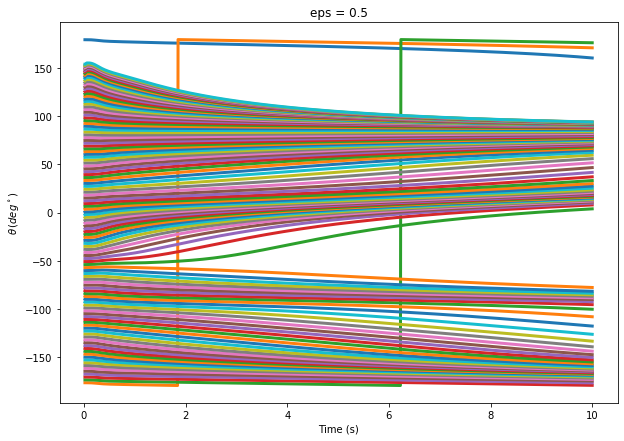

In [9]:
angles = np.arange(-180., 180, 3)
speeds = calc_speeds(angles, params, stim)

3.1276060970533925


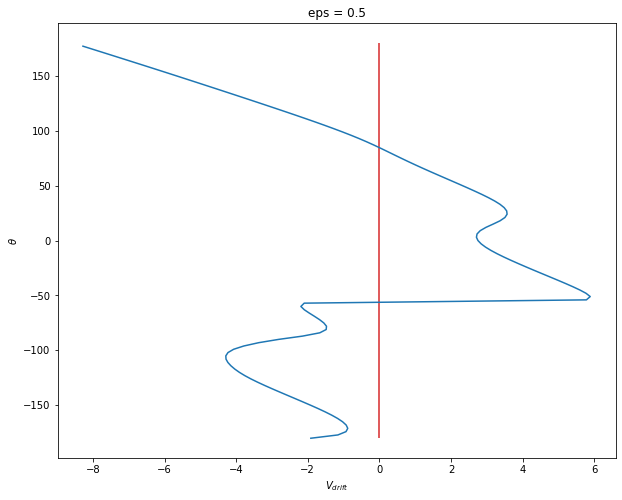

In [10]:
print(np.mean(np.abs(speeds)))
pl.figure(figsize=(10, 8))
pl.plot(speeds, angles, '-')
pl.title('eps = {}'.format(params['eps']))
pl.xlabel('$V_{drift}$')
pl.ylabel('$\\theta $')
pl.vlines(0, -180, 180, 'C3');